<a href="https://colab.research.google.com/github/shivhub09/LSTM_STOCK_PRICE_PREDICTION/blob/main/STOCK_PRICE_PREDICTION_BHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
!pip install yfinance

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
from datetime import datetime
yf.pdr_override()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


In [4]:
end = datetime.now()
start = datetime(end.year - 5, end.month - 1, end.day-3)

In [5]:
df = yf.download("BHEL.NS" , start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-23,71.250000,71.599998,69.050003,69.349998,66.177376,5371992
2019-01-24,69.250000,70.099998,68.650002,69.050003,65.891106,6289323
2019-01-25,69.150002,69.500000,66.050003,66.400002,63.362335,7134722
2019-01-28,66.500000,66.750000,63.450001,63.750000,60.833565,8737901
2019-01-29,63.200001,65.349998,63.200001,64.400002,61.453831,8758306


In [7]:
df.shape

(1258, 6)

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,226.899994,233.800003,225.949997,230.899994,230.899994,22994469
2024-02-21,232.000000,232.350006,220.050003,221.899994,221.899994,22193528
2024-02-22,224.000000,229.399994,220.949997,228.500000,228.500000,25023398
2024-02-23,229.449997,233.750000,228.500000,229.600006,229.600006,21463226
2024-02-26,229.800003,232.149994,226.250000,228.050003,228.050003,14280717


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0        69.349998
1        69.050003
2        66.400002
3        63.750000
4        64.400002
           ...    
1253    230.899994
1254    221.899994
1255    228.500000
1256    229.600006
1257    228.050003
Name: Close, Length: 1258, dtype: float64

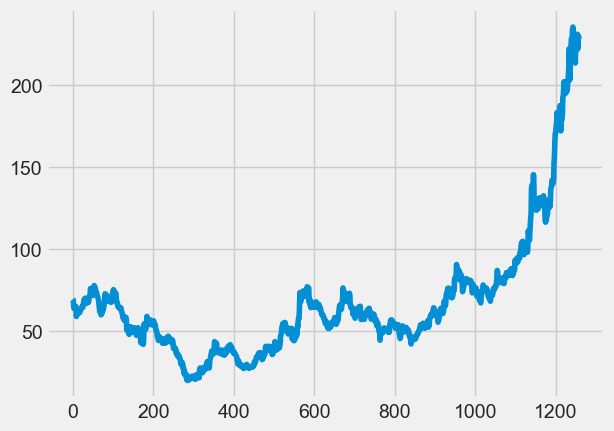

In [14]:
plt.plot(df1)

In [15]:
df1

0        69.349998
1        69.050003
2        66.400002
3        63.750000
4        64.400002
           ...    
1253    230.899994
1254    221.899994
1255    228.500000
1256    229.600006
1257    228.050003
Name: Close, Length: 1258, dtype: float64

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.22975167]
 [0.22835926]
 [0.21605941]
 ...
 [0.96843814]
 [0.97354376]
 [0.9663495 ]]


In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 441)

In [21]:
train_data

array([[0.22975167],
       [0.22835926],
       [0.21605941],
       [0.20375957],
       [0.20677652],
       [0.20445579],
       [0.20816893],
       [0.20654443],
       [0.20932929],
       [0.18101647],
       [0.19006729],
       [0.19656533],
       [0.1967974 ],
       [0.19911812],
       [0.19470874],
       [0.19702947],
       [0.19122766],
       [0.19169181],
       [0.1958691 ],
       [0.19911812],
       [0.20004641],
       [0.20329543],
       [0.20654443],
       [0.20886515],
       [0.20932929],
       [0.20700857],
       [0.21489905],
       [0.22023672],
       [0.22859131],
       [0.22394986],
       [0.21930841],
       [0.23300071],
       [0.23184034],
       [0.22348572],
       [0.22000464],
       [0.22255745],
       [0.2195405 ],
       [0.22394986],
       [0.22603853],
       [0.22139709],
       [0.22859131],
       [0.23764215],
       [0.23880252],
       [0.23996288],
       [0.26038522],
       [0.25458341],
       [0.25063819],
       [0.247

In [22]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)  

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 128)          66560     
                                                                 
 dropout_3 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_4 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 354ms/step - loss: 0.0060 - val_loss: 0.0717
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0019 - val_loss: 0.0296
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 9.7276e-04 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 8.3288e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 6.8372e-04 - val_loss: 0.0082
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 6.4961e-04 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 2s 192ms/step - loss: 6.4163e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 2s 206ms/step - loss: 6.5527e-04 - val_loss: 0.0044
Epoch 9/100
12/12 [==============================] - 3s 240ms/step - loss: 5.9206e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 4s 372ms

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.14.0'

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.39657819290876

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

108.34302714246398

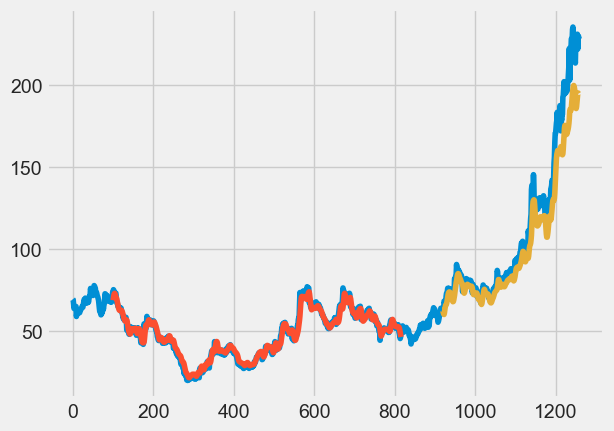

In [42]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

441

In [44]:
test_data.shape

(441, 1)

In [45]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
len(temp_input)

100

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.80982804]
101
1 day input [0.51659314 0.49988397 0.49918775 0.50614988 0.49477835 0.51682523
 0.51520076 0.51427242 0.50359714 0.51659314 0.52262704 0.50754233
 0.50754233 0.48897654 0.45439776 0.44766768 0.4548619  0.45393363
 0.46809002 0.46878625 0.47203528 0.50220469 0.5047575  0.51148759
 0.50638197 0.48944071 0.49176144 0.50684614 0.54142492 0.54560219
 0.551404   0.56625669 0.56207935 0.55581343 0.56300762 0.57043397
 0.61452772 0.63216524 0.67393827 0.69900206 0.69923415 0.71571131
 0.72801111 0.73613365 0.7586447  0.72801111 0.74170337 0.73358084
 0.74170337 0.74982591 0.75052217 0.77767459 0.76537479 0.70619632
 0.74541654 0.73543746 0.75353908 0.75237872 0.80181018 0.80621954
 0.82757016 0.84543976 0.81016473 0.81318172 0.8166628  0.81364582
 0.81573453 0.83453233 0.82571361 0.81967971 0.84195868 0.85008121
 0.86911118 0.89255043 0.93942909 0.84984913 0.88210718 0.92852166
 0.93501973 0.96588533 0.96727778 0.96379669 0.99303783 1.
 0.98375493 0.98259457 0.97911348 0.96402

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1258

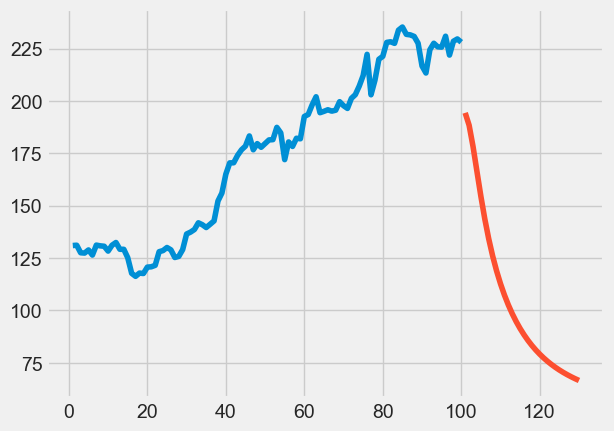

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

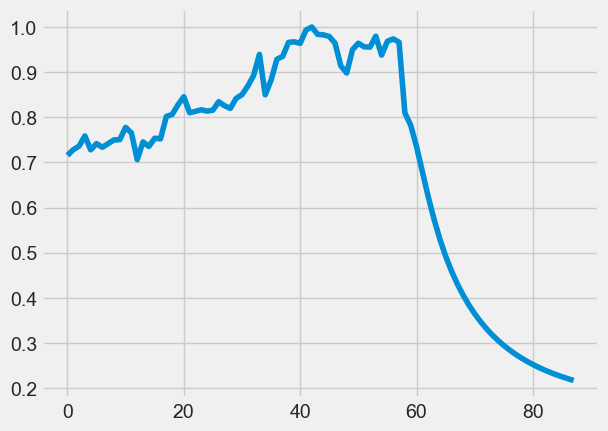

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

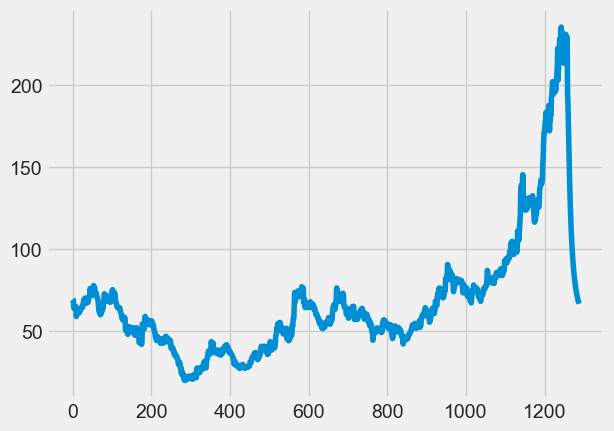

In [55]:
plt.plot(df3)

In [56]:
ytest.shape

(340,)

In [57]:
ytest[0]

0.19076351762393215

In [58]:
test_predict.shape

(340, 1)

In [59]:
test_predict.shape

(340, 1)

In [60]:
ytest[-1]

0.9735437601411168

In [61]:
original_value = scaler.inverse_transform([[ytest[339]]])[0, 0]

In [62]:
original_value

229.60000610351565

In [63]:
len(df3)

1288

In [64]:
len(df1)

1258

In [65]:
df3[1258]

[194.3274544048486]